# 2021 Train 2022 H1 Val H2 Test Time Forecasting 

In [1]:
import os
import datetime
from random import seed
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers
import keras
from keras import regularizers


In [2]:
# Set Random Number Seed
keras.utils.set_random_seed(30)
tf.config.experimental.enable_op_determinism()

In [3]:
df = pd.read_csv("2021-2022 data.csv")
df

,Unnamed: 0,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,datetime
0,0,0.0,0.0,0.0,0.0,0.0,12.72,2021-01-01 00:00:00
1,1,0.0,0.0,0.0,0.0,0.0,12.71,2021-01-01 01:00:00
2,2,0.0,0.0,0.0,0.0,0.0,12.73,2021-01-01 02:00:00
3,3,0.0,0.0,0.0,0.0,0.0,12.70,2021-01-01 03:00:00
4,4,0.0,0.0,0.0,0.0,0.0,12.68,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...
17515,17515,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 19:00:00
17516,17516,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 20:00:00
17517,17517,0.0,0.0,0.0,0.0,0.0,12.11,2022-12-31 21:00:00
17518,17518,0.0,0.0,0.0,0.0,0.0,12.09,2022-12-31 22:00:00


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)


In [5]:
n = len(df)
test = df[int(n*0.75):]
test_dates = test['datetime']
test_dates

13140   2022-07-02 12:00:00
13141   2022-07-02 13:00:00
13142   2022-07-02 14:00:00
13143   2022-07-02 15:00:00
13144   2022-07-02 16:00:00
                ...        
17515   2022-12-31 19:00:00
17516   2022-12-31 20:00:00
17517   2022-12-31 21:00:00
17518   2022-12-31 22:00:00
17519   2022-12-31 23:00:00
Name: datetime, Length: 4380, dtype: datetime64[ns]

In [6]:
df = df[['Waterlevel_Sto_Nino', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']]
df

,Waterlevel_Sto_Nino,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro
0,12.72,0.0,0.0,0.0,0.0,0.0
1,12.71,0.0,0.0,0.0,0.0,0.0
2,12.73,0.0,0.0,0.0,0.0,0.0
3,12.70,0.0,0.0,0.0,0.0,0.0
4,12.68,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
17515,12.11,0.0,0.0,0.0,0.0,0.0
17516,12.11,0.0,0.0,0.0,0.0,0.0
17517,12.11,0.0,0.0,0.0,0.0,0.0
17518,12.09,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Waterlevel_Sto_Nino  17520 non-null  float64
 1   Rainfall_Aries       17520 non-null  float64
 2   Rainfall_Boso        17520 non-null  float64
 3   Rainfall_Campana     17520 non-null  float64
 4   Rainfall_Nangka      17520 non-null  float64
 5   Rainfall_Oro         17520 non-null  float64
dtypes: float64(6)
memory usage: 821.4 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Waterlevel_Sto_Nino,17520.0,12.054239,0.683808,10.18,11.47,12.08,12.38,18.5
Rainfall_Aries,17520.0,0.212500,1.654015,0.00,0.00,0.00,0.00,61.0
Rainfall_Boso,17520.0,0.228824,1.662582,0.00,0.00,0.00,0.00,60.0
Rainfall_Campana,17520.0,0.247374,1.718368,0.00,0.00,0.00,0.00,66.0
Rainfall_Nangka,17520.0,0.220719,1.791129,0.00,0.00,0.00,0.00,56.0
Rainfall_Oro,17520.0,0.261844,2.026179,0.00,0.00,0.00,0.00,73.0


In [9]:
n = len(df)
train_df = df[0:int(n*0.5)]
val_df = df[int(n*0.5):int(n*0.75)]
test_df = df[int(n*0.75):]

num_features = df.shape[1]
num_features

6

In [10]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def plot(self, model=None, plot_col='Waterlevel_Sto_Nino', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')


# Dense Neural Network (DNN)

In [11]:
wide_window = WindowGenerator(input_width = 6, label_width = 6, shift = 1, label_columns = ['Waterlevel_Sto_Nino'])
wide_window


Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [1 2 3 4 5 6]
Label column name(s): ['Waterlevel_Sto_Nino']

### Hyperparameter tuning for the number of units
1. Number of dense layers - 2 to 5
2. Number of units per layer - 16 to 128 (step = 16)
3. Type of activation function - relu or tanh or sigmoid
4. Penalty of L2 Regularisation - lambda = 0.001, 0.0005, 0.0001

In [12]:
dnn_model_names = []
dnn_list_of_models = []

In [13]:
# Dense Neural Network
def dense_model(no_of_layers, no_of_units, acti, penalty):
    model_name = f'Dense_{no_of_layers}_{no_of_units}_{activation}_{penalty}'
    model = tf.keras.Sequential()
    for i in range(no_of_layers):
        model.add(layers.Dense(units = no_of_units, activation = acti, kernel_regularizer=regularizers.l2(penalty)))
    model.add(layers.Dense(units = 1))
    
    return model_name, model

for no_of_layers in range(2,6):
    for no_of_units in range(16,129,16):
        for activation in ['relu', 'tanh', 'sigmoid']:
            for penalty in [0.001, 0.0005, 0.0001]:
                model_name, model = dense_model(no_of_layers, no_of_units, activation, penalty)
                dnn_model_names.append(model_name)
                dnn_list_of_models.append(model)

In [14]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), r_square, NSE])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [16]:
performance = {}

In [17]:
dense_val_performance = {}
dnn_history = {}
for count, model in enumerate(dnn_list_of_models):
    model_name = dnn_model_names[count]
    dnn_history[model_name] = compile_and_fit(model, wide_window)
    dense_val_performance[model_name] = model.evaluate(wide_window.val, return_dict = True)


Epoch 1/10
274/274 [==============================] - 2s 3ms/step - loss: 5.1811 - mean_squared_error: 5.1593 - r_square: 0.5906 - NSE: -24.0974 - val_loss: 0.0750 - val_mean_squared_error: 0.0546 - val_r_square: 0.8305 - val_NSE: 0.7751
Epoch 2/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0785 - mean_squared_error: 0.0590 - r_square: 0.8192 - NSE: 0.7531 - val_loss: 0.0515 - val_mean_squared_error: 0.0326 - val_r_square: 0.8857 - val_NSE: 0.8694
Epoch 3/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0537 - mean_squared_error: 0.0353 - r_square: 0.8802 - NSE: 0.8551 - val_loss: 0.0434 - val_mean_squared_error: 0.0254 - val_r_square: 0.9050 - val_NSE: 0.8949
Epoch 4/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0432 - mean_squared_error: 0.0255 - r_square: 0.9143 - NSE: 0.9042 - val_loss: 0.0396 - val_mean_squared_error: 0.0222 - val_r_square: 0.9155 - val_NSE: 0.9066
Epoch 5/10
274/274 [==============================] - 

In [18]:
dense_val_performance

{'Dense_2_16_relu_0.001': {'loss': 0.030926723033189774,
  'mean_squared_error': 0.017235254868865013,
  'r_square': 0.9327854514122009,
  'NSE': 0.9277560114860535},
 'Dense_2_16_relu_0.0005': {'loss': 0.03770650923252106,
  'mean_squared_error': 0.028169060125947,
  'r_square': 0.9084530472755432,
  'NSE': 0.8846002221107483},
 'Dense_2_16_relu_0.0001': {'loss': 0.023545976728200912,
  'mean_squared_error': 0.021353071555495262,
  'r_square': 0.9199715256690979,
  'NSE': 0.9086670875549316},
 'Dense_2_16_tanh_0.001': {'loss': 0.8445923328399658,
  'mean_squared_error': 0.8160164952278137,
  'r_square': 0.14582650363445282,
  'NSE': -2.884146213531494},
 'Dense_2_16_tanh_0.0005': {'loss': 0.8408003449440002,
  'mean_squared_error': 0.823969304561615,
  'r_square': 0.08477519452571869,
  'NSE': -2.7572479248046875},
 'Dense_2_16_tanh_0.0001': {'loss': 0.8421682119369507,
  'mean_squared_error': 0.83920818567276,
  'r_square': 0.04647082835435867,
  'NSE': -3.462070941925049},
 'Dense_2

In [19]:
dense_models = pd.DataFrame.from_dict(dense_val_performance)
dense_models = dense_models.transpose()
dense_models = dense_models.sort_values(by = "loss")
dense_models = dense_models.reset_index()
dense_models


,index,loss,mean_squared_error,r_square,NSE
0,Dense_2_48_relu_0.0001,0.023255,0.018741,0.930824,0.923735
1,Dense_2_16_relu_0.0001,0.023546,0.021353,0.919972,0.908667
2,Dense_2_32_relu_0.0001,0.024098,0.020978,0.927587,0.909841
3,Dense_4_16_relu_0.0001,0.025291,0.020987,0.925732,0.918484
4,Dense_5_32_relu_0.0001,0.026039,0.018493,0.935059,0.928099
...,...,...,...,...,...
283,Dense_4_128_sigmoid_0.001,1.040702,0.922344,0.253603,-3.375207
284,Dense_5_80_sigmoid_0.001,1.063487,0.836553,0.836447,-2.854948
285,Dense_3_112_sigmoid_0.001,1.068776,0.847436,0.208479,-2.895294
286,Dense_4_80_sigmoid_0.001,1.084129,0.869752,0.518036,-3.099940


In [20]:
# We evaluate the best model according to least validation loss
# Constructing the best model
best_dnn_index = dense_models['loss'].idxmin()
best_dnn_model = dnn_list_of_models[best_dnn_index]
performance['Dense'] = best_dnn_model.evaluate(wide_window.test, verbose = 0, return_dict = True)

In [21]:
performance

{'Dense': {'loss': 0.032420068979263306,
  'mean_squared_error': 0.01872859336435795,
  'r_square': 0.9605380892753601,
  'NSE': 0.9568917751312256}}

In [22]:
# Test for Overfitting 
dnn_name = dnn_model_names[best_dnn_index]
dense_history = dnn_history[dnn_name].history


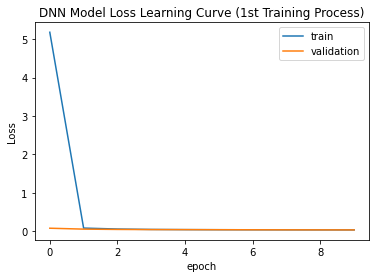

In [23]:
from matplotlib import pyplot as plt
plt.plot(dense_history['loss'])
plt.plot(dense_history['val_loss'])
plt.title('DNN Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [64]:
dense_history

{'loss': [5.181065082550049,
  0.07854019105434418,
  0.05373120680451393,
  0.04318941757082939,
  0.038650404661893845,
  0.03609555587172508,
  0.034619852900505066,
  0.0329330712556839,
  0.03171848878264427,
  0.030781736597418785],
 'mean_squared_error': [5.159297943115234,
  0.05898674204945564,
  0.035324182361364365,
  0.02553015761077404,
  0.021679610013961792,
  0.019816158339381218,
  0.018983716145157814,
  0.017899934202432632,
  0.017248179763555527,
  0.01683788187801838],
 'r_square': [0.5906450748443604,
  0.8192145228385925,
  0.8802410960197449,
  0.9143447279930115,
  0.9291277527809143,
  0.9338748455047607,
  0.9393415451049805,
  0.9384596347808838,
  0.9416673183441162,
  0.947395384311676],
 'NSE': [-24.097368240356445,
  0.7530959844589233,
  0.855140745639801,
  0.904159426689148,
  0.92168790102005,
  0.92731773853302,
  0.9332073330879211,
  0.932380735874176,
  0.9365381598472595,
  0.9427030086517334],
 'val_loss': [0.07496949285268784,
  0.05151647701

In [60]:
dh = dense_history['loss']
dvh = dense_history['val_loss']

In [62]:
dh = dh[1:]
dvh = dvh[1:]


In [69]:
dnn_n = len(dh)

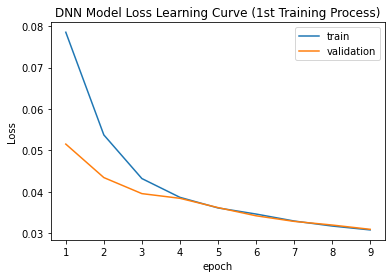

In [71]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(1,dnn_n, dnn_n), dh)
plt.plot(np.linspace(1,dnn_n, dnn_n), dvh)
plt.title('DNN Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [24]:
dense_history_2 = compile_and_fit(best_dnn_model, wide_window)

Epoch 1/10
274/274 [==============================] - 2s 3ms/step - loss: 0.0301 - mean_squared_error: 0.0172 - r_square: 0.9452 - NSE: 0.9388 - val_loss: 0.0300 - val_mean_squared_error: 0.0176 - val_r_square: 0.9380 - val_NSE: 0.9289
Epoch 2/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0286 - mean_squared_error: 0.0164 - r_square: 0.9468 - NSE: 0.9419 - val_loss: 0.0301 - val_mean_squared_error: 0.0182 - val_r_square: 0.9355 - val_NSE: 0.9288
Epoch 3/10
274/274 [==============================] - 1s 3ms/step - loss: 0.0275 - mean_squared_error: 0.0159 - r_square: 0.9490 - NSE: 0.9431 - val_loss: 0.0284 - val_mean_squared_error: 0.0171 - val_r_square: 0.9346 - val_NSE: 0.9277
Epoch 4/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0266 - mean_squared_error: 0.0156 - r_square: 0.9502 - NSE: 0.9449 - val_loss: 0.0297 - val_mean_squared_error: 0.0190 - val_r_square: 0.9405 - val_NSE: 0.9239
Epoch 5/10
274/274 [==============================] - 1s

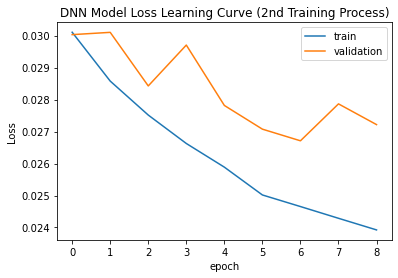

In [25]:
from matplotlib import pyplot as plt
plt.plot(dense_history_2.history['loss'])
plt.plot(dense_history_2.history['val_loss'])
plt.title('DNN Model Loss Learning Curve (2nd Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [26]:
dense_predictions = best_dnn_model.predict(test_df)
actual = test_df['Waterlevel_Sto_Nino']
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module



137/137 [==============================] - 0s 839us/step


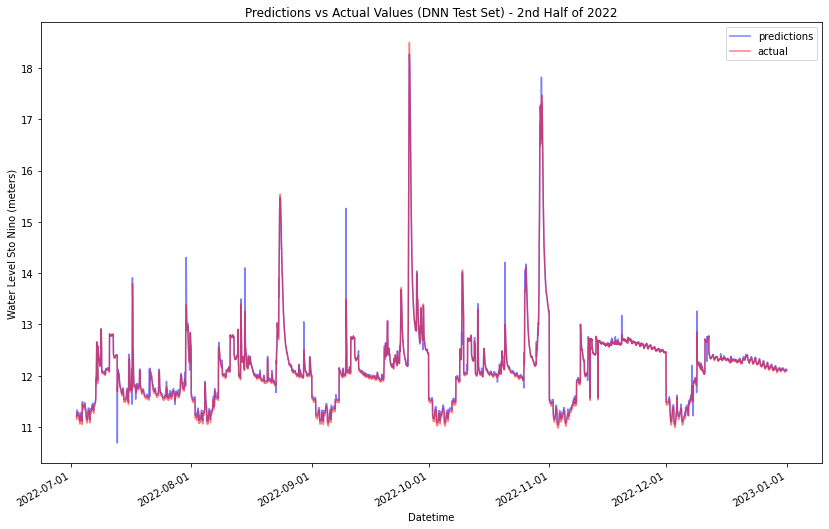

In [27]:
plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates, dense_predictions, c = "blue", label = "predictions", alpha = 0.5)
plt.plot(test_dates, actual, c = "red", label = "actual", alpha = 0.5)
plt.title('Predictions vs Actual Values (DNN Test Set) - 2nd Half of 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

In [ ]:
# Set Random Number Seed
keras.utils.set_random_seed(30)
tf.config.experimental.enable_op_determinism()

In [28]:
actual.idxmax()
actual[15193]
max(dense_predictions)

array([18.271421], dtype=float32)

In [29]:
cnn_model_names = []
cnn_list_of_models = []

In [30]:
# Convolution Neural Network (CNN)
CONV_WIDTH = 6

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Waterlevel_Sto_Nino'])

In [31]:
# Convolution Neural Network (CNN)
def cnn_model(no_of_layers, no_of_units, acti, penalty):
    model_name = f'CNN_{no_of_layers}_{no_of_units}_{activation}_{penalty}'
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(filters = 64, kernel_size =(CONV_WIDTH,), activation = acti, kernel_regularizer = regularizers.l2(penalty)))
    for i in range(no_of_layers):
        model.add(layers.Dense(units = no_of_units, activation = acti, kernel_regularizer = regularizers.l2(penalty)))
    model.add(layers.Dense(units = 1))
    
    return model_name, model

for no_of_layers in range(2,6):
    for no_of_units in range(16,129,16):
        for activation in ['relu', 'tanh', 'sigmoid']:
            for penalty in [0.001, 0.0005, 0.0001]:
                model_name, model = cnn_model(no_of_layers, no_of_units, activation, penalty)
                cnn_model_names.append(model_name)
                cnn_list_of_models.append(model)

In [32]:
cnn_val_performance = {}
cnn_history = {}
for count, model in enumerate(cnn_list_of_models):
    model_name = cnn_model_names[count]
    cnn_history[model_name] = compile_and_fit(model, conv_window)
    cnn_val_performance[model_name] = model.evaluate(conv_window.val, return_dict = True)


Epoch 1/10
274/274 [==============================] - 2s 3ms/step - loss: 6.2716 - mean_squared_error: 6.2252 - r_square: 0.7298 - NSE: -26.8381 - val_loss: 0.1074 - val_mean_squared_error: 0.0636 - val_r_square: 0.8172 - val_NSE: 0.7343
Epoch 2/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0806 - mean_squared_error: 0.0380 - r_square: 0.9017 - NSE: 0.8496 - val_loss: 0.0953 - val_mean_squared_error: 0.0538 - val_r_square: 0.8313 - val_NSE: 0.7827
Epoch 3/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0681 - mean_squared_error: 0.0276 - r_square: 0.9216 - NSE: 0.8939 - val_loss: 0.0876 - val_mean_squared_error: 0.0481 - val_r_square: 0.8478 - val_NSE: 0.7924
Epoch 4/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0626 - mean_squared_error: 0.0240 - r_square: 0.9315 - NSE: 0.9124 - val_loss: 0.0852 - val_mean_squared_error: 0.0476 - val_r_square: 0.8429 - val_NSE: 0.8043
Epoch 5/10
274/274 [==============================] - 

In [33]:
cnn_models = pd.DataFrame.from_dict(cnn_val_performance)
cnn_models = cnn_models.transpose()
cnn_models = cnn_models.sort_values(by = 'loss')
cnn_models = cnn_models.reset_index()
cnn_models

,index,loss,mean_squared_error,r_square,NSE
0,CNN_2_16_relu_0.0001,0.051360,0.046845,0.863696,0.816870
1,CNN_2_48_relu_0.0001,0.051902,0.044147,0.850790,0.809565
2,CNN_3_16_relu_0.0001,0.054067,0.049129,0.835504,0.799521
3,CNN_5_32_relu_0.0001,0.055712,0.043983,0.874524,0.817660
4,CNN_4_32_relu_0.0001,0.057598,0.046875,0.837813,0.802210
...,...,...,...,...,...
283,CNN_5_112_tanh_0.0005,1.160477,0.909381,0.398028,-3.553218
284,CNN_5_64_tanh_0.001,1.171856,0.906224,0.174168,-3.355983
285,CNN_5_128_tanh_0.0005,1.185676,0.894118,0.158153,-3.341018
286,CNN_3_128_tanh_0.001,1.269278,0.963141,0.226872,-3.672992


In [34]:
# We get the best performing model that has the least validation loss
best_cnn_index = cnn_models['loss'].idxmin()
best_cnn_model = cnn_list_of_models[best_cnn_index]
performance['CNN'] = best_cnn_model.evaluate(conv_window.test, verbose = 0, return_dict = True)

In [35]:
# Test for Overfitting CNN 
cnn_name = cnn_model_names[best_cnn_index]
conv_history = cnn_history[cnn_name].history


In [36]:
performance

{'Dense': {'loss': 0.032420068979263306,
  'mean_squared_error': 0.01872859336435795,
  'r_square': 0.9605380892753601,
  'NSE': 0.9568917751312256},
 'CNN': {'loss': 0.07733196765184402,
  'mean_squared_error': 0.04942264035344124,
  'r_square': 0.9252632260322571,
  'NSE': 0.9011021852493286}}

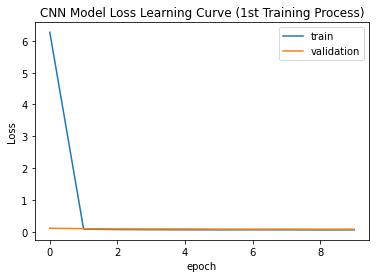

In [37]:
from matplotlib import pyplot as plt
plt.plot(conv_history['loss'])
plt.plot(conv_history['val_loss'])
plt.title('CNN Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [72]:
ch = conv_history['loss']
cvh = conv_history['val_loss']
ch = ch[1:]
cvh = cvh[1:]


In [74]:
cnn_n = len(ch)

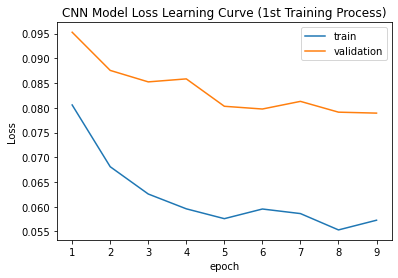

In [75]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(1,cnn_n, cnn_n), ch)
plt.plot(np.linspace(1,cnn_n, cnn_n), cvh)
plt.title('CNN Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
conv_history_2 = compile_and_fit(best_cnn_model, conv_window)

Epoch 1/10
274/274 [==============================] - 2s 3ms/step - loss: 0.0522 - mean_squared_error: 0.0315 - r_square: 0.9256 - NSE: 0.8773 - val_loss: 0.0645 - val_mean_squared_error: 0.0460 - val_r_square: 0.8505 - val_NSE: 0.8071
Epoch 2/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0473 - mean_squared_error: 0.0297 - r_square: 0.9294 - NSE: 0.8890 - val_loss: 0.0606 - val_mean_squared_error: 0.0437 - val_r_square: 0.8529 - val_NSE: 0.8228
Epoch 3/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0415 - mean_squared_error: 0.0253 - r_square: 0.9327 - NSE: 0.8943 - val_loss: 0.0632 - val_mean_squared_error: 0.0477 - val_r_square: 0.8628 - val_NSE: 0.7976
Epoch 4/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0239 - r_square: 0.9357 - NSE: 0.9073 - val_loss: 0.0601 - val_mean_squared_error: 0.0457 - val_r_square: 0.8707 - val_NSE: 0.8112
Epoch 5/10
274/274 [==============================] - 1s

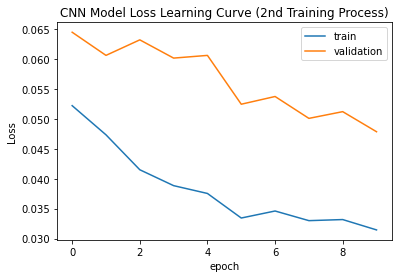

In [39]:
from matplotlib import pyplot as plt
plt.plot(conv_history_2.history['loss'])
plt.plot(conv_history_2.history['val_loss'])
plt.title('CNN Model Loss Learning Curve (2nd Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [40]:
prediction_data = test_df.values.reshape(1, -1, CONV_WIDTH)  # Add batch dimension of 1
conv_predictions = best_cnn_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 0s 163ms/step


In [41]:
# reshape the conv_predictions array
# delete the first 5 values of the actual and test_dates arrays (corresponding to t = 0 to 4)

conv_predictions = conv_predictions.reshape(4375)
actual = actual[5:]
test_dates_cnn = test_dates[5:]


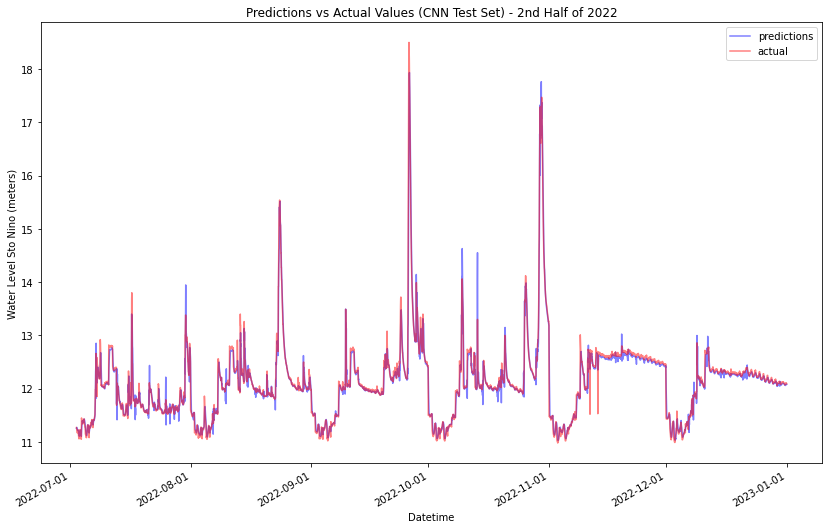

In [42]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates_cnn, conv_predictions, c = "blue", label = "predictions", alpha = 0.5)
plt.plot(test_dates_cnn, actual, c = "red", label = "actual", alpha = 0.5)
plt.title('Predictions vs Actual Values (CNN Test Set) - 2nd Half of 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

In [ ]:
# Set Random Number Seed
keras.utils.set_random_seed(30)
tf.config.experimental.enable_op_determinism()

In [43]:
lstm_model_names = []
lstm_list_of_models = []

In [44]:
# LSTM / RNN

# Dense Neural Network
def lstm_model(no_of_layers, no_of_units, acti, penalty):
    model_name = f'LSTM_{no_of_layers}_{no_of_units}_{activation}_{penalty}'
    model = tf.keras.Sequential()
    model.add(layers.LSTM(64, return_sequences = True, kernel_regularizer = regularizers.l2(penalty)))
    for i in range(no_of_layers):
        model.add(layers.Dense(units = no_of_units, activation = acti, kernel_regularizer = regularizers.l2(penalty)))
    model.add(layers.Dense(units = 1))
    
    return model_name, model

for no_of_layers in range(2,6):
    for no_of_units in range(16,129,16):
        for activation in ['relu', 'tanh', 'sigmoid']:
            for penalty in [0.001, 0.0005, 0.0001]:
                model_name, model = lstm_model(no_of_layers, no_of_units, activation, penalty)
                lstm_model_names.append(model_name)
                lstm_list_of_models.append(model)

In [45]:
lstm_val_performance = {}
lstm_history = {}
for count, model in enumerate(lstm_list_of_models):
    model_name = lstm_model_names[count]
    lstm_history[model_name] = compile_and_fit(model, wide_window)
    lstm_val_performance[model_name] = model.evaluate(wide_window.val, return_dict = True)
print(lstm_val_performance)

Epoch 1/10
274/274 [==============================] - 6s 7ms/step - loss: 24.1283 - mean_squared_error: 24.0717 - r_square: 0.1717 - NSE: -118.1389 - val_loss: 0.8657 - val_mean_squared_error: 0.8066 - val_r_square: 0.2790 - val_NSE: -2.8241
Epoch 2/10
274/274 [==============================] - 1s 5ms/step - loss: 0.2626 - mean_squared_error: 0.2062 - r_square: 0.4130 - NSE: 0.2747 - val_loss: 0.5514 - val_mean_squared_error: 0.4974 - val_r_square: 0.6063 - val_NSE: -1.3670
Epoch 3/10
274/274 [==============================] - 1s 5ms/step - loss: 0.1904 - mean_squared_error: 0.1381 - r_square: 0.6888 - NSE: 0.5211 - val_loss: 0.3229 - val_mean_squared_error: 0.2722 - val_r_square: 0.8007 - val_NSE: -0.3223
Epoch 4/10
274/274 [==============================] - 1s 5ms/step - loss: 0.1281 - mean_squared_error: 0.0787 - r_square: 0.8138 - NSE: 0.7238 - val_loss: 0.1572 - val_mean_squared_error: 0.1091 - val_r_square: 0.8511 - val_NSE: 0.5048
Epoch 5/10
274/274 [============================

In [46]:
lstm_models = pd.DataFrame.from_dict(lstm_val_performance)
lstm_models = lstm_models.transpose()
lstm_models = lstm_models.sort_values(by = "loss")
lstm_models = lstm_models.reset_index()
lstm_models

,index,loss,mean_squared_error,r_square,NSE
0,LSTM_5_16_relu_0.0001,0.033703,0.027129,0.920820,0.881947
1,LSTM_3_16_relu_0.0001,0.036258,0.030163,0.918933,0.871746
2,LSTM_4_32_relu_0.0001,0.036439,0.026117,0.922367,0.888329
3,LSTM_2_64_relu_0.0001,0.036589,0.027010,0.916455,0.887070
4,LSTM_2_128_relu_0.0001,0.036650,0.021251,0.926289,0.919153
...,...,...,...,...,...
283,LSTM_4_96_tanh_0.0005,1.101353,0.920377,0.260695,-3.379562
284,LSTM_5_96_tanh_0.0005,1.190093,0.985577,0.176203,-3.552074
285,LSTM_5_64_tanh_0.001,1.230569,0.925167,0.147835,-3.304510
286,LSTM_5_112_tanh_0.001,1.455337,1.014578,0.157945,-3.769731


In [47]:
# We evaluate the best model according to least validation loss
# Constructing the best model
best_lstm_index = lstm_models['loss'].idxmin()
best_lstm_model = lstm_list_of_models[best_lstm_index]
performance['LSTM'] = best_lstm_model.evaluate(wide_window.test, verbose = 0, return_dict = True)

In [48]:
performance

{'Dense': {'loss': 0.032420068979263306,
  'mean_squared_error': 0.01872859336435795,
  'r_square': 0.9605380892753601,
  'NSE': 0.9568917751312256},
 'CNN': {'loss': 0.07733196765184402,
  'mean_squared_error': 0.04942264035344124,
  'r_square': 0.9252632260322571,
  'NSE': 0.9011021852493286},
 'LSTM': {'loss': 0.07084567844867706,
  'mean_squared_error': 0.03417225182056427,
  'r_square': 0.9484485983848572,
  'NSE': 0.9364966154098511}}

In [49]:
# Test for Overfitting LSTM 
lstm_name = lstm_model_names[best_lstm_index]
long_history = lstm_history[lstm_name].history
long_history

{'loss': [24.128320693969727,
  0.2625975012779236,
  0.19036157429218292,
  0.12807993590831757,
  0.09775795787572861,
  0.08284090459346771,
  0.07430069893598557,
  0.0673847645521164,
  0.06283174455165863,
  0.0589810386300087],
 'mean_squared_error': [24.071693420410156,
  0.2061566561460495,
  0.1380774974822998,
  0.07867706567049026,
  0.0507359579205513,
  0.03798329830169678,
  0.0314357690513134,
  0.026411598548293114,
  0.0236408319324255,
  0.021488578990101814],
 'r_square': [0.17167453467845917,
  0.41304975748062134,
  0.6888317465782166,
  0.8138089776039124,
  0.8590515851974487,
  0.8900189399719238,
  0.9093030691146851,
  0.9208396673202515,
  0.9285117387771606,
  0.9356005787849426],
 'NSE': [-118.13894653320312,
  0.2747408449649811,
  0.5211334824562073,
  0.7238475680351257,
  0.8210756778717041,
  0.8667043447494507,
  0.8905819654464722,
  0.9087154865264893,
  0.9168055057525635,
  0.9258570671081543],
 'val_loss': [0.8657467365264893,
  0.55143123865127

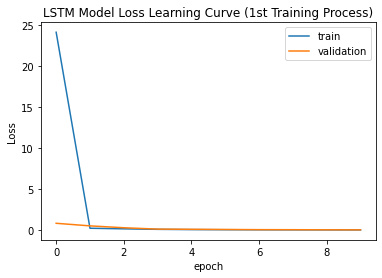

In [50]:
from matplotlib import pyplot as plt
plt.plot(long_history['loss'])
plt.plot(long_history['val_loss'])
plt.title('LSTM Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [76]:
lh = long_history['loss']
lvh = long_history['val_loss']
lh = lh[1:]
lvh = lvh[1:]
lnn_n = len(lh)

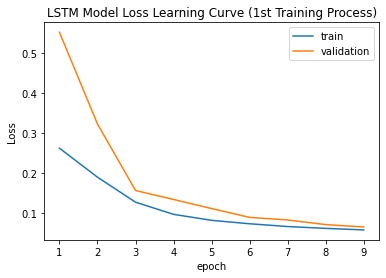

In [78]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(1,lnn_n, lnn_n), lh)
plt.plot(np.linspace(1,lnn_n, lnn_n), lvh)
plt.title('LSTM Model Loss Learning Curve (1st Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [51]:
long_history_2 = compile_and_fit(best_lstm_model, wide_window)

Epoch 1/10
274/274 [==============================] - 4s 7ms/step - loss: 0.0556 - mean_squared_error: 0.0253 - r_square: 0.9412 - NSE: 0.9085 - val_loss: 0.0556 - val_mean_squared_error: 0.0278 - val_r_square: 0.9246 - val_NSE: 0.8837
Epoch 2/10
274/274 [==============================] - 1s 5ms/step - loss: 0.0443 - mean_squared_error: 0.0170 - r_square: 0.9499 - NSE: 0.9421 - val_loss: 0.0571 - val_mean_squared_error: 0.0304 - val_r_square: 0.9209 - val_NSE: 0.8718
Epoch 3/10
274/274 [==============================] - 1s 5ms/step - loss: 0.0426 - mean_squared_error: 0.0164 - r_square: 0.9515 - NSE: 0.9418 - val_loss: 0.0504 - val_mean_squared_error: 0.0247 - val_r_square: 0.9289 - val_NSE: 0.8978
Epoch 4/10
274/274 [==============================] - 1s 5ms/step - loss: 0.0406 - mean_squared_error: 0.0153 - r_square: 0.9539 - NSE: 0.9469 - val_loss: 0.0503 - val_mean_squared_error: 0.0253 - val_r_square: 0.9180 - val_NSE: 0.8869
Epoch 5/10
274/274 [==============================] - 1s

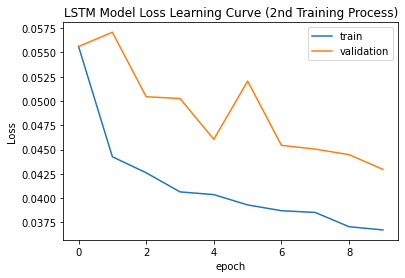

In [52]:
from matplotlib import pyplot as plt
plt.plot(long_history_2.history['loss'])
plt.plot(long_history_2.history['val_loss'])
plt.title('LSTM Model Loss Learning Curve (2nd Training Process)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [53]:
prediction_data = test_df.values.reshape(1, -1, 6)  # Add batch dimension of 1
lstm_predictions = best_lstm_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 1s 821ms/step


In [54]:
print(lstm_predictions.shape)
lstm_predictions = lstm_predictions.reshape(4380)
print(actual.shape)
print(lstm_predictions.shape)


(1, 4380, 1)
(4380,)
(4380,)


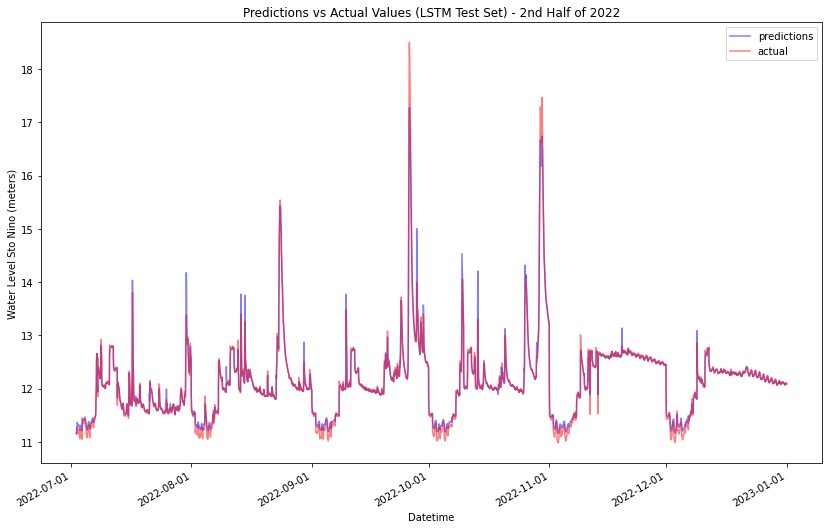

In [55]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.figure(figsize=(14, 9))  # Adjust the width and height as needed
plt.plot(test_dates, lstm_predictions, c = "blue", label = "predictions", alpha = 0.5)
plt.plot(test_dates, actual, c = "red", label = "actual", alpha = 0.5)
plt.title('Predictions vs Actual Values (LSTM Test Set) - 2nd Half of 2022')
plt.ylabel('Water Level Sto Nino (meters)')
plt.xlabel('Datetime')

# Set x-axis major locator to show ticks for every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Format the dates as YYYY-MM-DD
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()

plt.legend()
plt.show()

In [56]:
performance

{'Dense': {'loss': 0.032420068979263306,
  'mean_squared_error': 0.01872859336435795,
  'r_square': 0.9605380892753601,
  'NSE': 0.9568917751312256},
 'CNN': {'loss': 0.07733196765184402,
  'mean_squared_error': 0.04942264035344124,
  'r_square': 0.9252632260322571,
  'NSE': 0.9011021852493286},
 'LSTM': {'loss': 0.07084567844867706,
  'mean_squared_error': 0.03417225182056427,
  'r_square': 0.9484485983848572,
  'NSE': 0.9364966154098511}}

In [57]:
max(lstm_predictions)

17.272247

In [58]:
pd.DataFrame.from_dict(performance).transpose()

,loss,mean_squared_error,r_square,NSE
Dense,0.032420,0.018729,0.960538,0.956892
CNN,0.077332,0.049423,0.925263,0.901102
LSTM,0.070846,0.034172,0.948449,0.936497


## Predictions (starting from t = 5)

In [79]:
test_dates_cnn


13145   2022-07-02 17:00:00
13146   2022-07-02 18:00:00
13147   2022-07-02 19:00:00
13148   2022-07-02 20:00:00
13149   2022-07-02 21:00:00
                ...        
17515   2022-12-31 19:00:00
17516   2022-12-31 20:00:00
17517   2022-12-31 21:00:00
17518   2022-12-31 22:00:00
17519   2022-12-31 23:00:00
Name: datetime, Length: 4375, dtype: datetime64[ns]

In [80]:
print(dense_predictions.shape)
dense_predictions = dense_predictions.reshape(4380)

print(conv_predictions.shape)
print(lstm_predictions.shape)
dense_predictions
dense_predictions = dense_predictions[5:]
lstm_predictions = lstm_predictions[5:]

(4380, 1)
(4375,)
(4380,)


In [81]:
actual = actual[5:]

In [82]:
print(actual.shape)
print(dense_predictions.shape)
print(conv_predictions.shape)
print(lstm_predictions.shape)
print(test_dates_cnn.shape)

(4375,)
(4375,)
(4375,)
(4375,)
(4375,)


In [83]:
data = {
    'datetime': test_dates_cnn.tolist(),
    'actual': actual.tolist(),
    'dense_predictions': dense_predictions.tolist(),
    'conv_predictions': conv_predictions.tolist(),
    'lstm_predictions': lstm_predictions.tolist()
}

predictions = pd.DataFrame(data)


In [84]:
predictions

,datetime,actual,dense_predictions,conv_predictions,lstm_predictions
0,2022-07-02 17:00:00,11.27,11.322616,11.257009,11.367105
1,2022-07-02 18:00:00,11.25,11.303393,11.267327,11.357852
2,2022-07-02 19:00:00,11.23,11.284171,11.270833,11.344999
3,2022-07-02 20:00:00,11.21,11.264949,11.264326,11.331237
4,2022-07-02 21:00:00,11.19,11.245727,11.251468,11.317321
...,...,...,...,...,...
4370,2022-12-31 19:00:00,12.11,12.129945,12.077910,12.097460
4371,2022-12-31 20:00:00,12.11,12.129945,12.082144,12.099465
4372,2022-12-31 21:00:00,12.11,12.129945,12.085540,12.100657
4373,2022-12-31 22:00:00,12.09,12.110724,12.082371,12.088350


In [85]:
predictions[predictions['actual'] == 18.5]

,datetime,actual,dense_predictions,conv_predictions,lstm_predictions
2048,2022-09-26 01:00:00,18.5,18.271421,17.209846,17.272247


In [86]:
predictions.to_csv('2H 2022 Predictions.csv')

## Multi-step models
- Uses the past 24 hours of data to predict the water level 24 hours into the future

In [ ]:
OUT_STEPS = 24
multistep_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multistep_window

In [ ]:
multi_val_performance = {}
multi_performance = {}

In [ ]:
# Autoregressive model : decomposes the prediction into individual time steps, you use the output for the next prediction
# Autoregressive LSTM/RNN

class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(6)
    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.lstm_rnn(inputs)
        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state
    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the LSTM state.
        prediction, state = self.warmup(inputs)

        # Insert the first prediction.
        predictions.append(prediction)

        # Run the rest of the prediction steps.
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.lstm_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output.
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        print(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        print(predictions)
        return predictions




In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)
prediction, state = feedback_model.warmup(multistep_window.example[0])
prediction.shape

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multistep_window.example[0]).shape)


In [ ]:
history = compile_and_fit(feedback_model, multistep_window)

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multistep_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multistep_window.test, verbose=0, return_dict=True)

In [ ]:
multi_performance

In [ ]:
prediction_data = test_df.values.reshape(1, -1, 6)  # Add batch dimension of 1
ar_lstm_predictions = feedback_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

In [ ]:
ar_lstm_predictions